![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

Restaurant_id       City                                      Cuisine Style  \
0       id_5569      Paris            ['European', 'French', 'International']   
1       id_1535  Stockholm                                                NaN   
2        id_352     London  ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...   
3       id_3456     Berlin                                                NaN   
4        id_615     Munich  ['German', 'Central European', 'Vegetarian Fri...   

   Ranking  Rating Price Range  Number of Reviews  \
0   5570.0     3.5    $$ - $$$              194.0   
1   1537.0     4.0         NaN               10.0   
2    353.0     4.5        $$$$              688.0   
3   3458.0     5.0         NaN                3.0   
4    621.0     4.0    $$ - $$$               84.0   

                                             Reviews  \
0  [['Good food at your doorstep', 'A good hotel ...   
1  [['Unique cuisine', 'Delicious Nepalese food']...   
2  [['Catch up with friends', 'Not exceptional'],...   
3                                           [[], []]   
4  [['Best place to try a Bavarian food', 'Nice b...   

                                              URL_TA     ID_TA  
0  /Restaurant_Review-g187147-d1912643-Reviews-R_...  d1912643  
1  /Restaurant_Review-g189852-d7992032-Reviews-Bu...  d7992032  
2  /Restaurant_Review-g186338-d8632781-Reviews-RO...  d8632781  
3  /Restaurant_Review-g187323-d1358776-Reviews-Es...  d1358776  
4  /Restaurant_Review-g187309-d6864963-Reviews-Au...  d6864963

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

Restaurant_id        City  \
0          id_0       Paris   
1          id_1    Helsinki   
2          id_2   Edinburgh   
3          id_3      London   
4          id_4  Bratislava   

                                       Cuisine Style  Ranking Price Range  \
0                                     ['Bar', 'Pub']  12963.0    $$ - $$$   
1  ['European', 'Scandinavian', 'Gluten Free Opti...    106.0    $$ - $$$   
2                            ['Vegetarian Friendly']    810.0    $$ - $$$   
3  ['Italian', 'Mediterranean', 'European', 'Vege...   1669.0        $$$$   
4  ['Italian', 'Mediterranean', 'European', 'Seaf...     37.0        $$$$   

   Number of Reviews                                            Reviews  \
0                4.0                                           [[], []]   
1               97.0  [['Very good reviews!', 'Fine dining in Hakani...   
2               28.0  [['Better than the Links', 'Ivy Black'], ['12/...   
3              202.0  [['Most exquisite', 'Delicious and authentic']...   
4              162.0  [['Always the best in bratislava', 'Very good ...   

                                              URL_TA      ID_TA  
0  /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918  
1  /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944  
2  /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638  
3  /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417  
4  /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354

In [9]:
sample_submission.head(5)

Restaurant_id  Rating
0          id_0     2.0
1          id_1     2.5
2          id_2     4.0
3          id_3     1.0
4          id_4     4.0

In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

Restaurant_id       City  \
18578      id_10263     London   
44964        id_217  Stockholm   
13363        id_768     London   
49877        id_895     Prague   
21523       id_3516     Prague   

                                           Cuisine Style  Ranking Price Range  \
18578                          ['Bar', 'Pub', 'British']  10272.0    $$ - $$$   
44964  ['European', 'Russian', 'Ukrainian', 'Eastern ...    218.0    $$ - $$$   
13363  ['Bar', 'Barbecue', 'British', 'Pub', 'Vegetar...    769.0    $$ - $$$   
49877                                           ['Cafe']    896.0    $$ - $$$   
21523                              ['European', 'Czech']   3524.0         NaN   

       Number of Reviews                                            Reviews  \
18578               53.0  [['Great pizzas served with a smile', 'simple ...   
44964               42.0  [['So good!', 'Made with love!'], ['11/05/2017...   
13363              281.0  [['A new favorite', 'Always worth a visit'], [...   
49877               21.0  [['Can’t go wrong', 'Great breakfast, cool ven...   
21523                8.0                                           [[], []]   

                                                  URL_TA      ID_TA  sample  \
18578  /Restaurant_Review-g186338-d3613532-Reviews-Re...   d3613532       1   
44964  /Restaurant_Review-g189852-d12378233-Reviews-G...  d12378233       1   
13363  /Restaurant_Review-g186338-d1044772-Reviews-Lo...   d1044772       1   
49877  /Restaurant_Review-g274707-d10666952-Reviews-P...  d10666952       1   
21523  /Restaurant_Review-g274707-d7124245-Reviews-U_...   d7124245       1   

       Rating  
18578     4.0  
44964     4.5  
13363     4.5  
49877     4.5  
21523     3.5

In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [15]:
# добавлю функцию нахождения выбросов
def IQR(column):
    perc_25 = data[column].quantile(0.25, interpolation="midpoint")
    perc_75 = data[column].quantile(0.75, interpolation="midpoint")
    IQR = perc_75 - perc_25
    print('Q1: {}'.format(perc_25), 'Q3: {}'.format(perc_75), 'IQR: {}'.format(IQR),
          'Граница выбросов: [{a},{b}]'.format(a=perc_25 - 1.5*IQR, b=perc_75 + 1.5*IQR), sep='\n')

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

Посмотрим пропуски:

In [16]:
data.isnull().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

Пропуски обнаружены в 4х признаках, cuisine_style, price_range, number_of_reviews и reviews.

Из за того, что в первых трех признаках(которые с NaN) пропущено много значений, позже пометим эти пропуски в отдельных столбцах.

In [17]:
data[data.Reviews.isnull()] # в reviews два пропуска, колонку с пометкой Nan создавать не буду, два пропуска не повлияют на конечный результат.

Restaurant_id    City Cuisine Style  Ranking Price Range  \
8168       id_8168  Lisbon           NaN   3389.0         NaN   
9608       id_9608  Vienna           NaN   1779.0         NaN   

      Number of Reviews Reviews  \
8168                2.0     NaN   
9608                NaN     NaN   

                                                 URL_TA      ID_TA  sample  \
8168  /Restaurant_Review-g189158-d12683988-Reviews-O...  d12683988       0   
9608  /Restaurant_Review-g190454-d12605368-Reviews-R...  d12605368       0   

      Rating  
8168     0.0  
9608     0.0

In [18]:
data.sample(5)

Restaurant_id       City  \
22028       id_1177      Milan   
19426       id_1725     London   
41136       id_1115   Helsinki   
49270       id_1988     Prague   
35866       id_1688  Amsterdam   

                                           Cuisine Style  Ranking Price Range  \
22028  ['Italian', 'Mediterranean', 'International', ...   1179.0    $$ - $$$   
19426  ['Indian', 'Healthy', 'Vegetarian Friendly', '...   1728.0    $$ - $$$   
41136                                                NaN   1116.0         NaN   
49270                                       ['American']   1991.0         NaN   
35866              ['Italian', 'Mediterranean', 'Pizza']   1693.0    $$ - $$$   

       Number of Reviews                                            Reviews  \
22028              288.0  [['Great traditional location', 'Very good foo...   
19426              439.0  [['Trying out for the family', 'Very flavourfu...   
41136                6.0  [['Just for fun', 'Worst place'], ['02/01/2017...   
49270                NaN                                           [[], []]   
35866               22.0  [['Small Italia in Amsterdam', 'Dinner'], ['02...   

                                                  URL_TA     ID_TA  sample  \
22028  /Restaurant_Review-g187849-d1088975-Reviews-Vi...  d1088975       1   
19426  /Restaurant_Review-g186338-d1557896-Reviews-Ma...  d1557896       1   
41136  /Restaurant_Review-g189934-d1138962-Reviews-St...  d1138962       1   
49270  /Restaurant_Review-g274707-d4768148-Reviews-KF...  d4768148       1   
35866  /Restaurant_Review-g188590-d4353700-Reviews-Tr...  d4353700       1   

       Rating  
22028     4.0  
19426     4.0  
41136     2.5  
49270     5.0  
35866     4.5

### Restaurant_id

In [19]:
# значения из этой колонки похожи на значения из колонки ranking, можно сделать этот признак числовым и посмотреть корреляцию
data.Restaurant_id = data.Restaurant_id.apply(lambda x: float(x[3:])) # убираю лишние символы в начале строки и изменяю тип данных на float

In [20]:
data[['Restaurant_id', 'Ranking']].corr()

Restaurant_id  Ranking
Restaurant_id        1.00000  0.82509
Ranking              0.82509  1.00000

Достаточно  большая корреляция, возможно первый признак можно будет удалить

### City

In [21]:
data.City.describe()

count      50000
unique        31
top       London
freq        7193
Name: City, dtype: object

In [22]:
data.City.value_counts() # категориальный признак, пропусков нет

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

добавлю признак - число ресторанов в городе

In [23]:
rest_per_city = data.groupby('City')['Ranking'].count().to_dict()
data['rest_per_city'] = data.City.map(rest_per_city)

In [24]:
# по подсказке из описания, добавлю признак количества жителей в городах из Википедии


popul = {
    'London' : 8909081,
    'Paris' : 2148271,
    'Madrid' : 3223334,
    'Barcelona' : 1620343,
    'Berlin' : 3769495,
    'Milan' : 1399860,
    'Rome' : 2860009,
    'Prague' : 1324277,
    'Lisbon' : 505526,
    'Vienna' : 2600000,
    'Amsterdam' : 872680,
    'Brussels' : 1208542,
    'Hamburg' : 1845229,
    'Munich' : 1484226,
    'Lyon' : 516092,
    'Stockholm' : 975904,
    'Budapest' : 1752286,
    'Warsaw' : 1793579,
    'Dublin' : 554554,
    'Copenhagen' : 794128,
    'Athens' : 664046,
    'Edinburgh' : 488050, 
    'Zurich' : 415215,
    'Oporto' : 287591,
    'Geneva' : 201818, 
    'Krakow' : 779115, 
    'Oslo' : 697549, 
    'Helsinki' : 656229,
    'Bratislava' : 437726,
    'Luxembourg' : 626108,
    'Ljubljana' : 295504
}

data['popul'] = data.City.map(popul)

In [25]:
# добавлю новый признак - отношение количества населения в городе к количеству ресторанов в городе
data['people_per_rest'] = data.popul / data.rest_per_city

In [26]:
# по подсказке из описания, добавлю признак качества жизни города
# (https://www.numbeo.com/quality-of-life/region_rankings.jsp?title=2018&region=150)

quality_index_city = {
    'London' : 124.80,
    'Paris' : 128.54,
    'Madrid' : 156.69,
    'Barcelona' : 135.19,
    'Berlin' : 172.32,
    'Milan' : 126.10,
    'Rome' : 109.84,
    'Prague' : 160.31,
    'Lisbon' : 155.28,
    'Vienna' : 188.60,
    'Amsterdam' : 179.20,
    'Brussels' : 151.72,
    'Hamburg' : 176.03,
    'Munich' : 194.65,
    'Lyon' : 159.83,
    'Stockholm' : 164.16,
    'Budapest' : 125.49,
    'Warsaw' : 143.52,
    'Dublin' : 147.02,
    'Copenhagen' : 192.90,
    'Athens' : 120.62,
    'Edinburgh' : 194.28, 
    'Zurich' : 202.37,
    'Oporto' : 159.83,
    'Geneva' : 189.65, 
    'Krakow' : 132.39, 
    'Oslo' : 159.41, 
    'Helsinki' : 186.75,
    'Bratislava' : 154.15,
    'Luxembourg' : 195.15,
    'Ljubljana' : 168.19
}

data['quality_index_city'] = data.City.map(quality_index_city)

In [27]:
# по подсказке из описания, дабавлю признак - индекс покупательской способности
# (https://www.numbeo.com/quality-of-life/region_rankings.jsp?title=2018&region=150)

purchasing_power_index = {
    'London' : 24,
    'Paris' : 22,
    'Madrid' : 23,
    'Barcelona' : 30,
    'Berlin' : 8,
    'Milan' : 40,
    'Rome' : 37,
    'Prague' : 31,
    'Lisbon' : 48,
    'Vienna' : 21,
    'Amsterdam' : 19,
    'Brussels' : 15,
    'Hamburg' : 7,
    'Munich' : 6,
    'Lyon' : 70,
    'Stockholm' : 13,
    'Budapest' : 51,
    'Warsaw' : 29,
    'Dublin' : 27,
    'Copenhagen' : 10,
    'Athens' : 53,
    'Edinburgh' : 16, 
    'Zurich' : 2,
    'Oporto' : 42,
    'Geneva' : 3, 
    'Krakow' : 36, 
    'Oslo' : 17, 
    'Helsinki' : 9,
    'Bratislava' : 39,
    'Luxembourg' : 4,
    'Ljubljana' : 32
}

data['purchasing_power'] = data.City.map(purchasing_power_index)

In [28]:
data

Restaurant_id        City  \
0                0.0       Paris   
1                1.0    Helsinki   
2                2.0   Edinburgh   
3                3.0      London   
4                4.0  Bratislava   
...              ...         ...   
49995          499.0       Milan   
49996         6340.0       Paris   
49997         1649.0   Stockholm   
49998          640.0      Warsaw   
49999         4824.0       Milan   

                                           Cuisine Style  Ranking Price Range  \
0                                         ['Bar', 'Pub']  12963.0    $$ - $$$   
1      ['European', 'Scandinavian', 'Gluten Free Opti...    106.0    $$ - $$$   
2                                ['Vegetarian Friendly']    810.0    $$ - $$$   
3      ['Italian', 'Mediterranean', 'European', 'Vege...   1669.0        $$$$   
4      ['Italian', 'Mediterranean', 'European', 'Seaf...     37.0        $$$$   
...                                                  ...      ...         ...   
49995  ['Italian', 'Vegetarian Friendly', 'Vegan Opti...    500.0    $$ - $$$   
49996  ['French', 'American', 'Bar', 'European', 'Veg...   6341.0    $$ - $$$   
49997                              ['Japanese', 'Sushi']   1652.0         NaN   
49998  ['Polish', 'European', 'Eastern European', 'Ce...    641.0    $$ - $$$   
49999                                        ['Spanish']   4827.0    $$ - $$$   

       Number of Reviews                                            Reviews  \
0                    4.0                                           [[], []]   
1                   97.0  [['Very good reviews!', 'Fine dining in Hakani...   
2                   28.0  [['Better than the Links', 'Ivy Black'], ['12/...   
3                  202.0  [['Most exquisite', 'Delicious and authentic']...   
4                  162.0  [['Always the best in bratislava', 'Very good ...   
...                  ...                                                ...   
49995               79.0  [['The real Italian experience!', 'Wonderful f...   
49996              542.0  [['Parisian atmosphere', 'Bit pricey but inter...   
49997                4.0  [['Good by swedish standards', 'A hidden jewel...   
49998               70.0  [['Underground restaurant', 'Oldest Restaurant...   
49999              260.0  [['Average', 'Nice an informal'], ['01/31/2016...   

                                                  URL_TA      ID_TA  sample  \
0      /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918       0   
1      /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944       0   
2      /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638       0   
3      /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417       0   
4      /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354       0   
...                                                  ...        ...     ...   
49995  /Restaurant_Review-g187849-d2104414-Reviews-Ro...   d2104414       1   
49996  /Restaurant_Review-g187147-d1800036-Reviews-La...   d1800036       1   
49997  /Restaurant_Review-g189852-d947615-Reviews-Sus...    d947615       1   
49998  /Restaurant_Review-g274856-d1100838-Reviews-Ho...   d1100838       1   
49999  /Restaurant_Review-g187849-d1109020-Reviews-Ta...   d1109020       1   

       Rating  rest_per_city    popul  people_per_rest  quality_index_city  \
0         0.0           6108  2148271       351.714309              128.54   
1         0.0            475   656229      1381.534737              186.75   
2         0.0            745   488050       655.100671              194.28   
3         0.0           7193  8909081      1238.576533              124.80   
4         0.0            380   437726      1151.910526              154.15   
...       ...            ...      ...              ...                 ...   
49995     4.5           2694  1399860       519.621381              126.10   
49996     3.5           6108  2148271       351.714309              128.54   
4

In [29]:
# добавлю признак отношения количества ресторанов в городе к индексу качеству жизни
data['quality_rest'] = data.rest_per_city / data.quality_index_city

### Cuisine style - категориальный признак

In [30]:
data['Cuisine Style'].value_counts()

['Italian']                                                                                                                               1332
['French']                                                                                                                                1019
['Spanish']                                                                                                                                860
['French', 'European']                                                                                                                     503
['Cafe']                                                                                                                                   500
                                                                                                                                          ... 
['Italian', 'Bar', 'Pizza', 'Pub', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']                                            1

In [31]:
len(data['Cuisine Style'].loc[data['Cuisine Style'].isnull() == 1]) # 11590 пропусков

11590

In [32]:
# Пустые значения cuisine_style заполним категорией Other, предварительно выделив пропуски в отдельный признак
data['cuisine_style_NAN'] = pd.isna(data['Cuisine Style']).astype('uint8')
data['Cuisine Style'] = data['Cuisine Style'].fillna("['Other']")

In [33]:
# переформатирую строку в список для работы со стилями кухонь
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: eval(x))

In [34]:
# посмотрю сколько кухонь в каждом ресторане и добавлю это как признак в num_cuisines. Думаю количество кухонь влияет на итоговый рейтинг
data['num_cuisines'] = data['Cuisine Style'].apply(lambda x: len(x))

In [35]:
data.sample(5)

Restaurant_id       City  \
28429           33.0     Krakow   
8855          8855.0      Paris   
43493        12581.0      Paris   
15777         9026.0      Paris   
6165          6165.0  Stockholm   

                                           Cuisine Style  Ranking Price Range  \
28429  [Polish, European, Eastern European, Central E...     34.0    $$ - $$$   
8855                                             [Other]  12795.0         NaN   
43493                                           [French]  12583.0    $$ - $$$   
15777                                           [French]   9028.0         NaN   
6165                                             [Other]   1987.0         NaN   

       Number of Reviews                                            Reviews  \
28429             1759.0  [['Lovely food', 'Lovely visit with good food ...   
8855                 4.0  [['Great bakery', 'Great Place for Breakfast i...   
43493                NaN                                           [[], []]   
15777                3.0                                           [[], []]   
6165                11.0  [['Relaxed feeling, excellent coffee', 'Not a ...   

                                                  URL_TA      ID_TA  sample  \
28429  /Restaurant_Review-g274772-d697135-Reviews-Pod...    d697135       1   
8855   /Restaurant_Review-g187147-d12561818-Reviews-A...  d12561818       0   
43493  /Restaurant_Review-g187147-d12351897-Reviews-P...  d12351897       1   
15777  /Restaurant_Review-g187147-d3651612-Reviews-A_...   d3651612       1   
6165   /Restaurant_Review-g189852-d5953076-Reviews-Ba...   d5953076       0   

       Rating  rest_per_city    popul  people_per_rest  quality_index_city  \
28429     4.5            554   779115      1406.344765              132.39   
8855      0.0           6108  2148271       351.714309              128.54   
43493     3.0           6108  2148271       351.714309              128.54   
15777     4.0           6108  2148271       351.714309              128.54   
6165      0.0           1033   975904       944.727977              164.16   

       purchasing_power  quality_rest  cuisine_style_NAN  num_cuisines  
28429                36      4.184606                  0             7  
8855                 22     47.518282                  1             1  
43493                22     47.518282                  0             1  
15777                22     47.518282                  0             1  
6165                 13      6.292641                  1             1

### Ranking: Ранг ресторана относительно других ресторанов в этом городе

In [36]:
data.info() # пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
Restaurant_id         50000 non-null float64
City                  50000 non-null object
Cuisine Style         50000 non-null object
Ranking               50000 non-null float64
Price Range           32639 non-null object
Number of Reviews     46800 non-null float64
Reviews               49998 non-null object
URL_TA                50000 non-null object
ID_TA                 50000 non-null object
sample                50000 non-null int64
Rating                50000 non-null float64
rest_per_city         50000 non-null int64
popul                 50000 non-null int64
people_per_rest       50000 non-null float64
quality_index_city    50000 non-null float64
purchasing_power      50000 non-null int64
quality_rest          50000 non-null float64
cuisine_style_NAN     50000 non-null uint8
num_cuisines          50000 non-null int64
dtypes: float64(7), int64(5), object(6), uint8(1)
memo

In [37]:
# посмотрю распределение признака

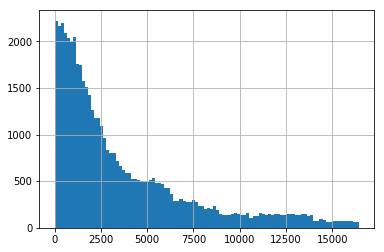

In [38]:
data.Ranking.hist(bins=100)

вполне нормальное распределение, как я думаю

In [39]:
# Добавлю признак относительного ранга ресторана по городу

data['ranking_city'] = data.Ranking / data.rest_per_city

### Price range - Цены в ресторане в 3 категориях

In [40]:
data['Price Range'].value_counts() # категориальный признак

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [41]:
sum(data['Price Range'].isnull()) # есть пропуски и много, поэтому пометим их в отдельном признаке

17361

In [42]:
data['price_range_NAN'] = pd.isna(data['Price Range']).astype('uint8') 

In [43]:
# поменяю значения признака на числовые используя Label Encoding
price = {'$' : 1, '$$ - $$$' : 2, '$$$$' : 3}
data['Price Range'] = data['Price Range'].map(price)

In [44]:
data.sample(5)

Restaurant_id        City                 Cuisine Style  Ranking  \
47696         1161.0      Vienna                       [Other]   1162.0   
5766          5766.0  Copenhagen        [Bar, American, Grill]    951.0   
31831        13971.0      London  [Chinese, Indian, Pakistani]  13981.0   
33426         3862.0       Milan                       [Other]   3864.0   
47226         3494.0        Rome      [Italian, Mediterranean]   3495.0   

       Price Range  Number of Reviews  \
47696          NaN               19.0   
5766           2.0               48.0   
31831          NaN                5.0   
33426          NaN                5.0   
47226          2.0              117.0   

                                                 Reviews  \
47696  [['"Silvester" or New Year\'s Eve', 'Cute plac...   
5766   [['Christmas 🎄 party 🎉', 'Great food and great...   
31831  [['Gone very down hill', 'Arshad Shahed. USA']...   
33426                                           [[], []]   
47226  [['Good but not great', 'authentic, fresh food...   

                                                  URL_TA      ID_TA  sample  \
47696  /Restaurant_Review-g190454-d6884319-Reviews-Re...   d6884319       1   
5766   /Restaurant_Review-g189541-d10242685-Reviews-C...  d10242685       0   
31831  /Restaurant_Review-g186338-d953776-Reviews-She...    d953776       1   
33426  /Restaurant_Review-g187849-d13238213-Reviews-D...  d13238213       1   
47226  /Restaurant_Review-g187791-d1012596-Reviews-Al...   d1012596       1   

       ...  rest_per_city    popul  people_per_rest  quality_index_city  \
47696  ...           1443  2600000      1801.801802              188.60   
5766   ...            819   794128       969.631258              192.90   
31831  ...           7193  8909081      1238.576533              124.80   
33426  ...           2694  1399860       519.621381              126.10   
47226  ...           2589  2860009      1104.677095              109.84   

       purchasing_power  quality_rest  cuisine_style_NAN  num_cuisines  \
47696                21      7.651113                  1             1   
5766                 10      4.245723                  0             3   
31831                24     57.636218                  0             3   
33426                40     21.363997                  1             1   
47226                37     23.570648                  0             2   

       ranking_city  price_range_NAN  
47696      0.805267                1  
5766       1.161172                0  
31831      1.943695                1  
33426      1.434298                1  
47226      1.349942                0  

[5 rows x 21 columns]

In [45]:
data['Price Range'].describe()

count    32639.000000
mean         1.815129
std          0.509800
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Price Range, dtype: float64

In [46]:
sum(data['Price Range'].isnull())

17361

In [47]:
# заменю пропуски на на ноль, при замене на медиану mae выше, проверено на эксперименте
data['Price Range'] = data['Price Range'].fillna(0)

In [48]:
# проверю

data['Price Range'].value_counts()

2.0    23041
0.0    17361
1.0     7816
3.0     1782
Name: Price Range, dtype: int64

In [49]:
data['Price Range'].describe() 

count    50000.000000
mean         1.184880
std          0.957308
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: Price Range, dtype: float64

In [50]:
# добавлю признак отношения покуп способности в городе к ценовому диапазону ресторана
data['purchasing_range'] = data.purchasing_power / data['Price Range']

In [51]:
data.purchasing_range.value_counts() 
# так как в признаке Price Range есть нулевые значения, 
# при создании признака появился процесс деления на ноль и значения завполнились знеачением inf

inf          17361
12.000000     3664
11.000000     3109
24.000000     1973
15.000000     1731
             ...  
17.666667       24
5.333333        19
14.000000       18
1.333333        11
10.666667        7
Name: purchasing_range, Length: 74, dtype: int64

In [52]:
data.purchasing_range[np.isinf(data.purchasing_range)] = 0 # поменяем его на ноль

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
data.purchasing_range.value_counts() 

0.000000     17361
12.000000     3664
11.000000     3109
24.000000     1973
15.000000     1731
             ...  
17.666667       24
5.333333        19
14.000000       18
1.333333        11
10.666667        7
Name: purchasing_range, Length: 74, dtype: int64

### Number of Reviews: Количество отзывов

In [54]:
data['Number of Reviews'].describe()

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

очень сильно отличаются медиана и среднее, отклонение почти 300, скорей всего много выбросов, надо смотреть

In [55]:
sum(data['Number of Reviews'].isnull()) # 3200 пропусков

3200

In [56]:
data['number_of_reviews_NAN'] = pd.isna(data['Number of Reviews']).astype('uint8') # помечаю их в отдельном признаке

In [57]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

# посмотрю выбросы

In [58]:
IQR('Number of Reviews')

Q1: 7.0
Q3: 105.0
IQR: 98.0
Граница выбросов: [-140.0,252.0]


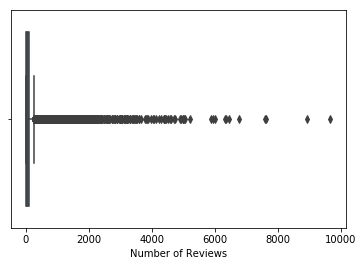

In [59]:
sns.boxplot(data['Number of Reviews']) 

судя по боксплоту - много данных находится за границей 75го перцентиля

In [60]:
sum(data['Number of Reviews'] > 252) # много...

5946

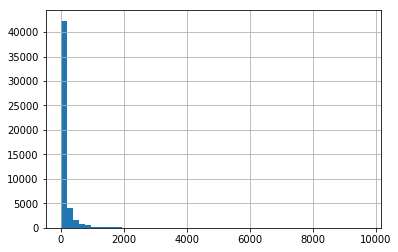

In [61]:
data['Number of Reviews'].hist(bins=50)

из гистограммы видно, что количество значений начинает уменьшаться примерно на отметке 1000

посмотрим сколько значений уходит за 1000

In [62]:
sum(data['Number of Reviews'] > 1000)

817

заменяю на 1000 все значения больше 1000

In [63]:
data['Number of Reviews'] = data['Number of Reviews'].apply(lambda x: 1000 if x > 1000 else x)

In [64]:
data['Number of Reviews'].describe()

count    50000.000000
mean       104.686100
std        190.516311
min          0.000000
25%          7.000000
50%         28.000000
75%        105.000000
max       1000.000000
Name: Number of Reviews, dtype: float64

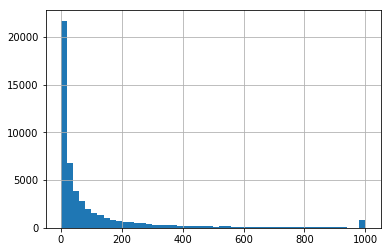

In [65]:
data['Number of Reviews'].hist(bins=50)

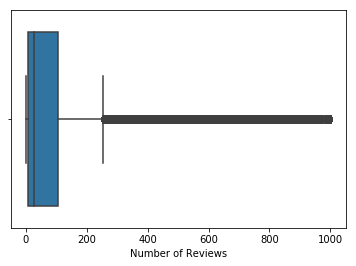

In [66]:
sns.boxplot(data['Number of Reviews']) 

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
Restaurant_id            50000 non-null float64
City                     50000 non-null object
Cuisine Style            50000 non-null object
Ranking                  50000 non-null float64
Price Range              50000 non-null float64
Number of Reviews        50000 non-null float64
Reviews                  49998 non-null object
URL_TA                   50000 non-null object
ID_TA                    50000 non-null object
sample                   50000 non-null int64
Rating                   50000 non-null float64
rest_per_city            50000 non-null int64
popul                    50000 non-null int64
people_per_rest          50000 non-null float64
quality_index_city       50000 non-null float64
purchasing_power         50000 non-null int64
quality_rest             50000 non-null float64
cuisine_style_NAN        50000 non-null uint8
num_cuisines             50000 non-null in

### Reviews: 2 последних отзыва и даты этих отзывов - Категориальный признак

In [68]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [69]:
data.Reviews[33]

"[['Nothing special, lazy service', 'Great food'], ['11/01/2016', '05/10/2016']]"

In [70]:
data.Reviews.isnull().sum()

2

Отзыв состоит из собственно отзывов и дат отзывов. два пропуска

In [71]:
data.Reviews.value_counts()

[[], []]                                                                                               8112
[['ok for beer, not for dinner'], ['12/20/2017']]                                                         2
[['Improve your service', 'Great value chain restaurant'], ['12/14/2017', '07/30/2017']]                  2
[['Good Lebanese food', 'Decent place'], ['07/19/2017', '03/17/2017']]                                    2
[['Good Paella', 'Good enough. Nothing more'], ['09/20/2017', '05/29/2017']]                              2
                                                                                                       ... 
[['Welcoming, Under New Management & One To W...', 'A good evening'], ['12/21/2017', '12/12/2017']]       1
[['Mr', 'Shani'], ['10/12/2017', '07/14/2017']]                                                           1
[['La Tastevin'], ['06/03/2014']]                                                                         1
[['Great for the family.', '

интересно то, что пропуска 2, но есть еще 8112 строк с пустым отзывом, так как это пустой список, он не помечается как Nan, но это явно можно считать пропуском

помечу эти пропуски в отдельный признак

In [72]:
sum(data.Reviews == '[[], []]')

8112

In [73]:
data['review_NAN'] = (data.Reviews == '[[], []]').astype('uint8')

In [74]:
# отделю дату от отзыва в отдельный признак data_review
data['date_review'] = data['Reviews'].apply(lambda x: [0] if pd.isna(x) else x[2:-2].split('], [')[1][1:-1].split("', '"))

In [75]:
data.sample(3)

Restaurant_id       City  \
34618         1425.0  Edinburgh   
17667         3469.0  Barcelona   
29941          369.0     Lisbon   

                                           Cuisine Style  Ranking  \
34618                                          [Chinese]   1426.0   
17667                                            [Other]   3470.0   
29941  [Seafood, European, Portuguese, Mediterranean,...    370.0   

       Price Range  Number of Reviews  \
34618          0.0                9.0   
17667          0.0                9.0   
29941          2.0              103.0   

                                                 Reviews  \
34618  [['Limited late night menu but did their best....   
17667              [['Excelent tapas!'], ['10/22/2016']]   
29941  [['Friendly staff, Good Food', 'Amazing Place'...   

                                                  URL_TA      ID_TA  sample  \
34618  /Restaurant_Review-g186525-d6678681-Reviews-Sz...   d6678681       1   
17667  /Restaurant_Review-g187497-d11711653-Reviews-V...  d11711653       1   
29941  /Restaurant_Review-g189158-d12818529-Reviews-C...  d12818529       1   

       ...  purchasing_power  quality_rest  cuisine_style_NAN  num_cuisines  \
34618  ...                16      3.834672                  0             1   
17667  ...                30     25.112804                  1             1   
29941  ...                48     10.606646                  0             6   

       ranking_city  price_range_NAN  purchasing_range  number_of_reviews_NAN  \
34618      1.914094                1               0.0                      0   
17667      1.022091                1               0.0                      0   
29941      0.224651                0              24.0                      0   

       review_NAN               date_review  
34618           0  [09/09/2015, 08/25/2015]  
17667           0              [10/22/2016]  
29941           0  [02/22/2018, 02/17/2018]  

[3 rows x 25 columns]

In [76]:
data.review_NAN.value_counts()

0    41888
1     8112
Name: review_NAN, dtype: int64

In [77]:
data['review_NAN'] = data.apply(lambda x: (1 if x.Reviews == '[[], []]' else 0)\
                             if pd.isna(x.review_NAN) else x.review_NAN , axis=1)

из даты можно добавить два признака - дней между отзывами(between_rev) и дней с последнего отзыва до сегодняшнего дня(till_now)

In [78]:
data['between_rev'] = data.date_review.apply(lambda x: None if x == [] else pd.to_datetime(x).max() - pd.to_datetime(x).min())

In [79]:
data.sample(3)

Restaurant_id    City                             Cuisine Style  \
18709         3582.0  Lisbon                                   [Other]   
40219         8514.0   Paris                                   [Other]   
43372         2543.0  London  [Bar, British, Pub, Vegetarian Friendly]   

       Ranking  Price Range  Number of Reviews  \
18709   3586.0          0.0               18.0   
40219   8516.0          0.0                3.0   
43372   2548.0          2.0              243.0   

                                                 Reviews  \
18709                   [['Nice place'], ['03/04/2017']]   
40219                                           [[], []]   
43372  [['Quick drink', 'Good Choice of Ale'], ['01/0...   

                                                  URL_TA      ID_TA  sample  \
18709  /Restaurant_Review-g189158-d10846196-Reviews-A...  d10846196       1   
40219  /Restaurant_Review-g187147-d12610491-Reviews-L...  d12610491       1   
43372  /Restaurant_Review-g186338-d3543459-Reviews-Wo...   d3543459       1   

       ...  quality_rest  cuisine_style_NAN  num_cuisines  ranking_city  \
18709  ...     10.606646                  1             1      2.177292   
40219  ...     47.518282                  1             1      1.394237   
43372  ...     57.636218                  0             4      0.354233   

       price_range_NAN  purchasing_range  number_of_reviews_NAN  review_NAN  \
18709                1               0.0                      0           0   
40219                1               0.0                      0           1   
43372                0              12.0                      0           0   

                    date_review  between_rev  
18709              [03/04/2017]       0 days  
40219                        []          NaT  
43372  [01/06/2018, 09/01/2017]     127 days  

[3 rows x 26 columns]

In [80]:
data.between_rev.describe()

count                       41888
mean     123 days 05:05:55.462184
std      212 days 14:08:22.315988
min               0 days 00:00:00
25%               8 days 00:00:00
50%              49 days 00:00:00
75%             148 days 00:00:00
max            3296 days 00:00:00
Name: between_rev, dtype: object

большой разброс данных, надор посмотреть выбросы, для этого переведу дату в число дней

In [81]:
data['between_rev'] = data['between_rev'].apply(lambda x: x.days)

In [82]:
IQR('between_rev')

Q1: 8.0
Q3: 148.0
IQR: 140.0
Граница выбросов: [-202.0,358.0]


In [83]:
sum(data.between_rev > 358) # смотрю сколько значений выходит за верхний перцинтль

3492

In [84]:
data.between_rev.hist(bins=100) # видно по распределению что хвост идет до 1250

In [85]:
sum(data.between_rev > 1250) # посмотрю сколько значений за пределами 1250

251

In [86]:
data.between_rev = data.between_rev.apply(lambda x: 1250 if x > 1250 else x) # заменю на 1250 все значения выше 1250

In [87]:
data.between_rev.describe()

count    41888.000000
mean       120.638393
std        192.407103
min          0.000000
25%          8.000000
50%         49.000000
75%        148.000000
max       1250.000000
Name: between_rev, dtype: float64

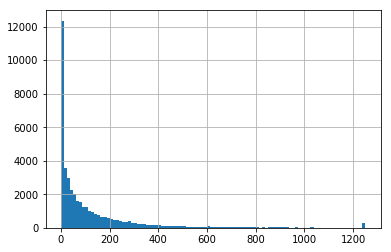

In [88]:
data.between_rev.hist(bins=100)

In [89]:
data.between_rev.isnull().sum() # заменю пропуски медианой

8112

In [90]:
data.between_rev = data.between_rev.fillna(data.between_rev.median())

создам следующий новый признак till_now - дней с последнего отзыва до сегодня

In [91]:
data['till_now'] = data.date_review.apply(lambda x: None if x == [] else pd.datetime.now() - pd.to_datetime(x).max())

In [92]:
data['till_now'] = data['till_now'].apply(lambda x: x.days) # заменю дату на колич дней

In [93]:
data.till_now.isnull().sum()

8112

In [94]:
data.till_now.describe()

count    41888.000000
mean      1398.871276
std        382.403027
min       1108.000000
25%       1187.000000
50%       1261.500000
75%       1445.000000
max      18696.000000
Name: till_now, dtype: float64

In [95]:
IQR('till_now') # посмотрю выбросы

Q1: 1187.0
Q3: 1445.0
IQR: 258.0
Граница выбросов: [800.0,1832.0]


In [96]:
sum(data.till_now > 1827) # смотрю сколько значений выходит за верхний перцинтль

4048

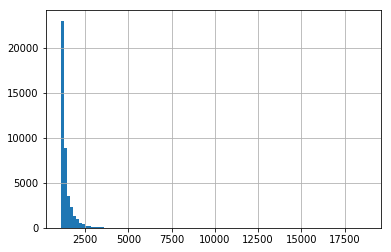

In [97]:
data.till_now.hist(bins=100) # видно по распределению что хвост гдето идет до 3000

In [98]:
sum(data.till_now > 3000) # посмотрю сколько значений за пределами 3000

348

In [99]:
data.till_now = data.till_now.apply(lambda x: 3000 if x > 3000 else x) # заменю значения более 3000 на 3000

In [100]:
data.till_now.describe()

count    41888.000000
mean      1393.970039
std        337.977259
min       1108.000000
25%       1187.000000
50%       1261.500000
75%       1445.000000
max       3000.000000
Name: till_now, dtype: float64

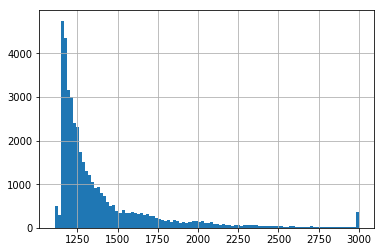

In [101]:
data.till_now.hist(bins=100)

In [102]:
data.till_now.isnull().sum() # пропуски

8112

In [103]:
data.till_now = data.till_now.fillna(data.till_now.mean()) # заполню средним

In [104]:
data.sample(3)

Restaurant_id    City     Cuisine Style  Ranking  Price Range  \
26191         1202.0  Vienna           [Asian]   1203.0          2.0   
12533         2920.0   Milan  [Italian, Pizza]   2922.0          1.0   
19744         1994.0  Warsaw           [Other]   1995.0          0.0   

       Number of Reviews                                            Reviews  \
26191               16.0  [['Amazing', 'Excellent lunch'], ['09/10/2017'...   
12533               24.0  [['Nice authentic local place', 'Overpriced'],...   
19744               10.0  [['Food OK, Service slimy', 'Good food, great ...   

                                                  URL_TA     ID_TA  sample  \
26191  /Restaurant_Review-g190454-d5039542-Reviews-Mu...  d5039542       1   
12533  /Restaurant_Review-g187849-d5808445-Reviews-Ri...  d5808445       1   
19744  /Restaurant_Review-g274856-d7606394-Reviews-Pr...  d7606394       1   

       ...  cuisine_style_NAN  num_cuisines  ranking_city  price_range_NAN  \
26191  ...                  0             1      0.833680                0   
12533  ...                  0             2      1.084633                0   
19744  ...                  1             1      2.156757                1   

       purchasing_range  number_of_reviews_NAN  review_NAN  \
26191              10.5                      0           0   
12533              40.0                      0           0   
19744               0.0                      0           0   

                    date_review  between_rev  till_now  
26191  [09/10/2017, 11/26/2016]        288.0    1277.0  
12533  [10/02/2015, 06/09/2015]        115.0    1986.0  
19744  [10/10/2016, 09/20/2015]        386.0    1612.0  

[3 rows x 27 columns]

## 'URL_TA' - урл ресторана и 'ID_TA' - айди ресторана

In [105]:
data

Restaurant_id        City  \
0                0.0       Paris   
1                1.0    Helsinki   
2                2.0   Edinburgh   
3                3.0      London   
4                4.0  Bratislava   
...              ...         ...   
49995          499.0       Milan   
49996         6340.0       Paris   
49997         1649.0   Stockholm   
49998          640.0      Warsaw   
49999         4824.0       Milan   

                                           Cuisine Style  Ranking  \
0                                             [Bar, Pub]  12963.0   
1      [European, Scandinavian, Gluten Free Options, ...    106.0   
2                                  [Vegetarian Friendly]    810.0   
3      [Italian, Mediterranean, European, Vegetarian ...   1669.0   
4      [Italian, Mediterranean, European, Seafood, Ve...     37.0   
...                                                  ...      ...   
49995  [Italian, Vegetarian Friendly, Vegan Options, ...    500.0   
49996  [French, American, Bar, European, Vegetarian F...   6341.0   
49997                                  [Japanese, Sushi]   1652.0   
49998  [Polish, European, Eastern European, Central E...    641.0   
49999                                          [Spanish]   4827.0   

       Price Range  Number of Reviews  \
0              2.0                4.0   
1              2.0               97.0   
2              2.0               28.0   
3              3.0              202.0   
4              3.0              162.0   
...            ...                ...   
49995          2.0               79.0   
49996          2.0              542.0   
49997          0.0                4.0   
49998          2.0               70.0   
49999          2.0              260.0   

                                                 Reviews  \
0                                               [[], []]   
1      [['Very good reviews!', 'Fine dining in Hakani...   
2      [['Better than the Links', 'Ivy Black'], ['12/...   
3      [['Most exquisite', 'Delicious and authentic']...   
4      [['Always the best in bratislava', 'Very good ...   
...                                                  ...   
49995  [['The real Italian experience!', 'Wonderful f...   
49996  [['Parisian atmosphere', 'Bit pricey but inter...   
49997  [['Good by swedish standards', 'A hidden jewel...   
49998  [['Underground restaurant', 'Oldest Restaurant...   
49999  [['Average', 'Nice an informal'], ['01/31/2016...   

                                                  URL_TA      ID_TA  sample  \
0      /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918       0   
1      /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944       0   
2      /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638       0   
3      /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417       0   
4      /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354       0   
...                                                  ...        ...     ...   
49995  /Restaurant_Review-g187849-d2104414-Reviews-Ro...   d2104414       1   
49996  /Restaurant_Review-g187147-d1800036-Reviews-La...   d1800036       1   
49997  /Restaurant_Review-g189852-d947615-Reviews-Sus...    d947615       1   
49998  /Restaurant_Review-g274856-d1100838-Reviews-Ho...   d1100838       1   
49999  /Restaurant_Review-g187849-d1109020-Reviews-Ta...   d1109020       1   

       ...  cuisine_style_NAN  num_cuisines  ranking_city  price_range_NAN  \
0      ...                  0             2      2.122299                0   
1      ...                  0             5      0.223158                0   
2      ...                  0             1      1.087248                0   
3      ...                  0             5      0.232031                0   
4      ...                  0             6      0.097368                0   
...    ...                ...           ...           ...              ...   
49995  ...                  0       

видно что в урл-адресе ресторана первый набор цифр означает город, а второй совпадает с ID_TA
Проверю



In [106]:
data[data['City'] == 'Paris'].sample(3)

Restaurant_id   City              Cuisine Style  Ranking  Price Range  \
25755        10636.0  Paris  [Moroccan, Mediterranean]  10638.0          0.0   
49507        11595.0  Paris                    [Other]  11597.0          0.0   
11872         5775.0  Paris                   [French]   5776.0          2.0   

       Number of Reviews                                            Reviews  \
25755                3.0                                           [[], []]   
49507               12.0                                           [[], []]   
11872               81.0  [['Average food, not much offered for vegetar....   

                                                  URL_TA      ID_TA  sample  \
25755  /Restaurant_Review-g187147-d5503581-Reviews-Re...   d5503581       1   
49507  /Restaurant_Review-g187147-d11766672-Reviews-R...  d11766672       1   
11872  /Restaurant_Review-g187147-d4156793-Reviews-La...   d4156793       1   

       ...  cuisine_style_NAN  num_cuisines  ranking_city  price_range_NAN  \
25755  ...                  0             2      1.741650                1   
49507  ...                  1             1      1.898657                1   
11872  ...                  0             1      0.945645                0   

       purchasing_range  number_of_reviews_NAN  review_NAN  \
25755               0.0                      0           1   
49507               0.0                      0           1   
11872              11.0                      0           0   

                    date_review  between_rev     till_now  
25755                        []         49.0  1393.970039  
49507                        []         49.0  1393.970039  
11872  [10/23/2016, 05/02/2016]        174.0  1599.000000  

[3 rows x 27 columns]

In [107]:
data[data['City'] == 'Milan'].sample(3)

Restaurant_id   City  \
9984          9984.0  Milan   
6023          6023.0  Milan   
23273         1139.0  Milan   

                                           Cuisine Style  Ranking  \
9984                              [Italian, German, Pub]   4430.0   
6023               [Italian, Greek, Vegetarian Friendly]   5789.0   
23273  [Pizza, Mediterranean, Vegetarian Friendly, Ve...   1141.0   

       Price Range  Number of Reviews  \
9984           2.0               89.0   
6023           2.0              586.0   
23273          2.0               55.0   

                                                 Reviews  \
9984                                            [[], []]   
6023   [['DO NOT ORDER FROM OR EAT HERE', 'Romantic p...   
23273  [['THE best bakery', 'Breakfast, lunch and din...   

                                                  URL_TA      ID_TA  sample  \
9984   /Restaurant_Review-g187849-d3498797-Reviews-La...   d3498797       0   
6023   /Restaurant_Review-g187849-d1391261-Reviews-Ca...   d1391261       0   
23273  /Restaurant_Review-g187849-d12615381-Reviews-S...  d12615381       1   

       ...  cuisine_style_NAN  num_cuisines  ranking_city  price_range_NAN  \
9984   ...                  0             3      1.644395                0   
6023   ...                  0             3      2.148849                0   
23273  ...                  0             4      0.423534                0   

       purchasing_range  number_of_reviews_NAN  review_NAN  \
9984               20.0                      0           1   
6023               20.0                      0           0   
23273              20.0                      0           0   

                    date_review  between_rev     till_now  
9984                         []         49.0  1393.970039  
6023   [05/12/2017, 10/04/2015]        586.0  1398.000000  
23273  [12/29/2017, 12/20/2017]          9.0  1167.000000  

[3 rows x 27 columns]

Так и есть.

Переведу эти признаки в соответствующие числовые значения, возможно это повлияет хорошо на модель. Иначе просто удалю эти признаки перед обучением модели

In [108]:
data.URL_TA = data.URL_TA.apply(lambda x: x[20:26]) # выделю первое числовое значение

In [109]:
data.URL_TA = data.URL_TA.apply(lambda x: float(x)) # конвертация в числовой формат

In [110]:
data.ID_TA = data.ID_TA.apply(lambda x: int(x[1:]))

In [111]:
data.sample(3)

Restaurant_id      City  \
33301          361.0  Brussels   
20921        11811.0     Paris   
35714         3168.0     Paris   

                                          Cuisine Style  Ranking  Price Range  \
33301  [Belgian, European, French, Vegetarian Friendly]    362.0          2.0   
20921                                           [Other]  11813.0          0.0   
35714     [French, Cafe, European, Vegetarian Friendly]   3169.0          2.0   

       Number of Reviews                                            Reviews  \
33301              202.0  [['Impressive deco / Good food', 'Delicious fo...   
20921                3.0         [['Standard Boulangerie'], ['12/28/2017']]   
35714              717.0  [['Great for Dining After Louvre Visit', 'Rest...   

         URL_TA     ID_TA  sample  ...  cuisine_style_NAN  num_cuisines  \
33301  188644.0   2442598       1  ...                  0             4   
20921  187147.0  12820231       1  ...                  1             1   
35714  187147.0    714911       1  ...                  0             4   

       ranking_city  price_range_NAN  purchasing_range  number_of_reviews_NAN  \
33301      0.275495                0               7.5                      0   
20921      1.934021                1               0.0                      0   
35714      0.518828                0              11.0                      0   

       review_NAN               date_review  between_rev  till_now  
33301           0  [12/05/2017, 11/14/2017]         21.0    1191.0  
20921           0              [12/28/2017]          0.0    1168.0  
35714           0  [01/08/2018, 12/31/2017]          8.0    1157.0  

[3 rows x 27 columns]

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
Restaurant_id            50000 non-null float64
City                     50000 non-null object
Cuisine Style            50000 non-null object
Ranking                  50000 non-null float64
Price Range              50000 non-null float64
Number of Reviews        50000 non-null float64
Reviews                  49998 non-null object
URL_TA                   50000 non-null float64
ID_TA                    50000 non-null int64
sample                   50000 non-null int64
Rating                   50000 non-null float64
rest_per_city            50000 non-null int64
popul                    50000 non-null int64
people_per_rest          50000 non-null float64
quality_index_city       50000 non-null float64
purchasing_power         50000 non-null int64
quality_rest             50000 non-null float64
cuisine_style_NAN        50000 non-null uint8
num_cuisines             50000 non-null in

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
Restaurant_id            50000 non-null float64
City                     50000 non-null object
Cuisine Style            50000 non-null object
Ranking                  50000 non-null float64
Price Range              50000 non-null float64
Number of Reviews        50000 non-null float64
Reviews                  49998 non-null object
URL_TA                   50000 non-null float64
ID_TA                    50000 non-null int64
sample                   50000 non-null int64
Rating                   50000 non-null float64
rest_per_city            50000 non-null int64
popul                    50000 non-null int64
people_per_rest          50000 non-null float64
quality_index_city       50000 non-null float64
purchasing_power         50000 non-null int64
quality_rest             50000 non-null float64
cuisine_style_NAN        50000 non-null uint8
num_cuisines             50000 non-null in

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [114]:
data.head(5)

Restaurant_id        City  \
0            0.0       Paris   
1            1.0    Helsinki   
2            2.0   Edinburgh   
3            3.0      London   
4            4.0  Bratislava   

                                       Cuisine Style  Ranking  Price Range  \
0                                         [Bar, Pub]  12963.0          2.0   
1  [European, Scandinavian, Gluten Free Options, ...    106.0          2.0   
2                              [Vegetarian Friendly]    810.0          2.0   
3  [Italian, Mediterranean, European, Vegetarian ...   1669.0          3.0   
4  [Italian, Mediterranean, European, Seafood, Ve...     37.0          3.0   

   Number of Reviews                                            Reviews  \
0                4.0                                           [[], []]   
1               97.0  [['Very good reviews!', 'Fine dining in Hakani...   
2               28.0  [['Better than the Links', 'Ivy Black'], ['12/...   
3              202.0  [['Most exquisite', 'Delicious and authentic']...   
4              162.0  [['Always the best in bratislava', 'Very good ...   

     URL_TA     ID_TA  sample  ...  cuisine_style_NAN  num_cuisines  \
0  187147.0  10746918       0  ...                  0             2   
1  189934.0   6674944       0  ...                  0             5   
2  186525.0  13129638       0  ...                  0             1   
3  186338.0    680417       0  ...                  0             5   
4  274924.0   1112354       0  ...                  0             6   

   ranking_city  price_range_NAN  purchasing_range  number_of_reviews_NAN  \
0      2.122299                0              11.0                      0   
1      0.223158                0               4.5                      0   
2      1.087248                0               8.0                      0   
3      0.232031                0               8.0                      0   
4      0.097368                0              13.0                      0   

   review_NAN               date_review  between_rev     till_now  
0           1                        []         49.0  1393.970039  
1           0  [12/05/2017, 10/29/2017]         37.0  1191.000000  
2           0  [12/28/2017, 12/06/2017]         22.0  1168.000000  
3           0  [12/06/2017, 11/22/2017]         14.0  1190.000000  
4           0  [02/08/2018, 01/24/2018]         15.0  1126.000000  

[5 rows x 27 columns]

In [115]:
data.sample(5)

Restaurant_id    City            Cuisine Style  Ranking  Price Range  \
47401         2578.0  Berlin  [Japanese, Sushi, Thai]   2580.0          0.0   
15548         3300.0  Madrid                [Spanish]   3302.0          0.0   
29989         9130.0   Paris                  [Other]   9132.0          0.0   
5761          5761.0  Madrid                [Spanish]   4020.0          0.0   
30118         1918.0    Lyon                  [Other]   1919.0          0.0   

       Number of Reviews                                            Reviews  \
47401               12.0                                           [[], []]   
15548                9.0                                           [[], []]   
29989                2.0  [['Next to the Louvre. Tasty, cheap, and fri.....   
5761                 0.0                                           [[], []]   
30118               16.0                                           [[], []]   

         URL_TA     ID_TA  sample  ...  cuisine_style_NAN  num_cuisines  \
47401  187323.0   7806999       1  ...                  0             3   
15548  187514.0   2147304       1  ...                  0             1   
29989  187147.0  12873313       1  ...                  1             1   
5761   187514.0  12709056       0  ...                  0             1   
30118  187265.0   9812181       1  ...                  1             1   

       ranking_city  price_range_NAN  purchasing_range  number_of_reviews_NAN  \
47401      0.953789                1               0.0                      0   
15548      0.865985                1               0.0                      0   
29989      1.495088                1               0.0                      0   
5761       1.054288                1               0.0                      1   
30118      1.704263                1               0.0                      0   

       review_NAN               date_review  between_rev     till_now  
47401           1                        []         49.0  1393.970039  
15548           1                        []         49.0  1393.970039  
29989           0  [12/08/2017, 09/03/2017]         96.0  1188.000000  
5761            1                        []         49.0  1393.970039  
30118           1                        []         49.0  1393.970039  

[5 rows x 27 columns]

#### Возьмем следующий признак "Price Range".

In [116]:
# data['Price Range'].value_counts()

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [117]:
# Ваша обработка 'Price Range' была произведена ранее

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [118]:
# тут ваш код на обработку других признаков
# .....

In [119]:
# зашифрую признак 'City', используя One-Hot Encoding, в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=['City'], dummy_na=True)

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

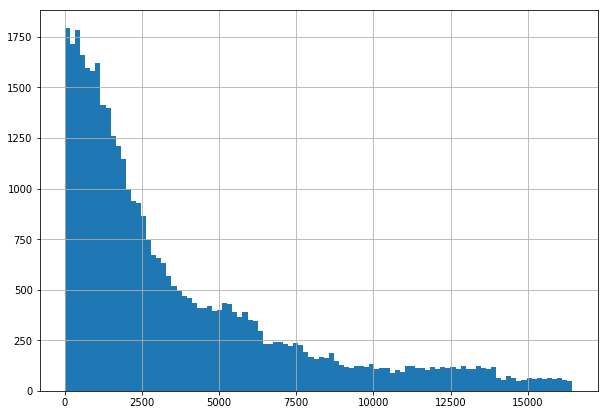

In [120]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

In [121]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

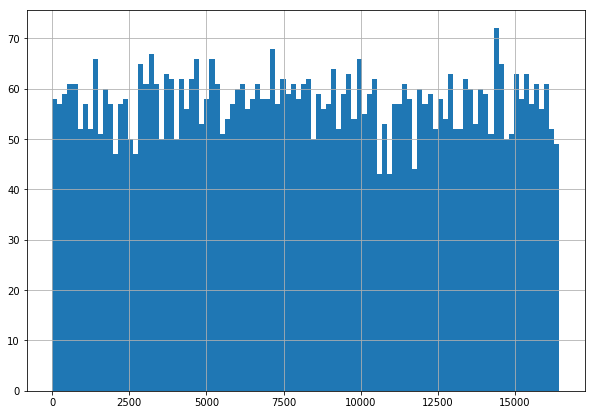

In [122]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

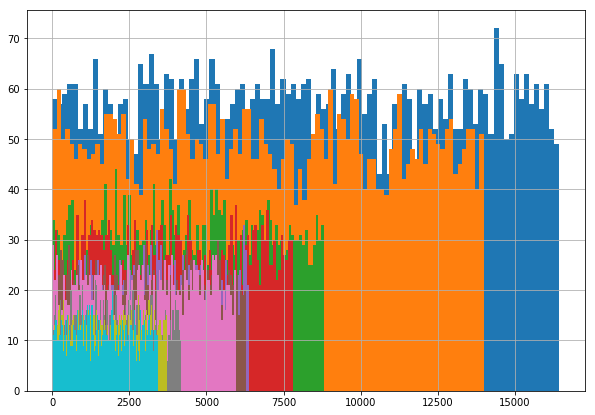

In [123]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

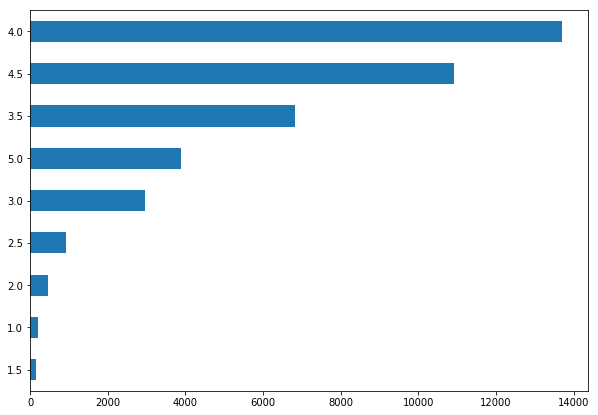

In [124]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

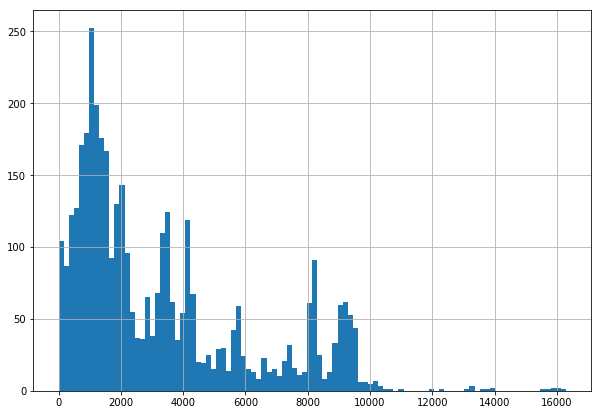

In [125]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

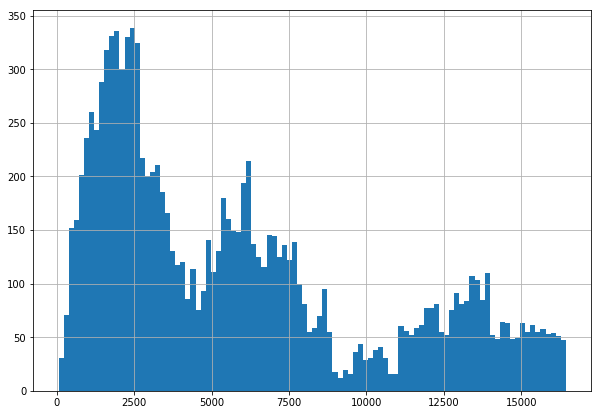

In [126]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

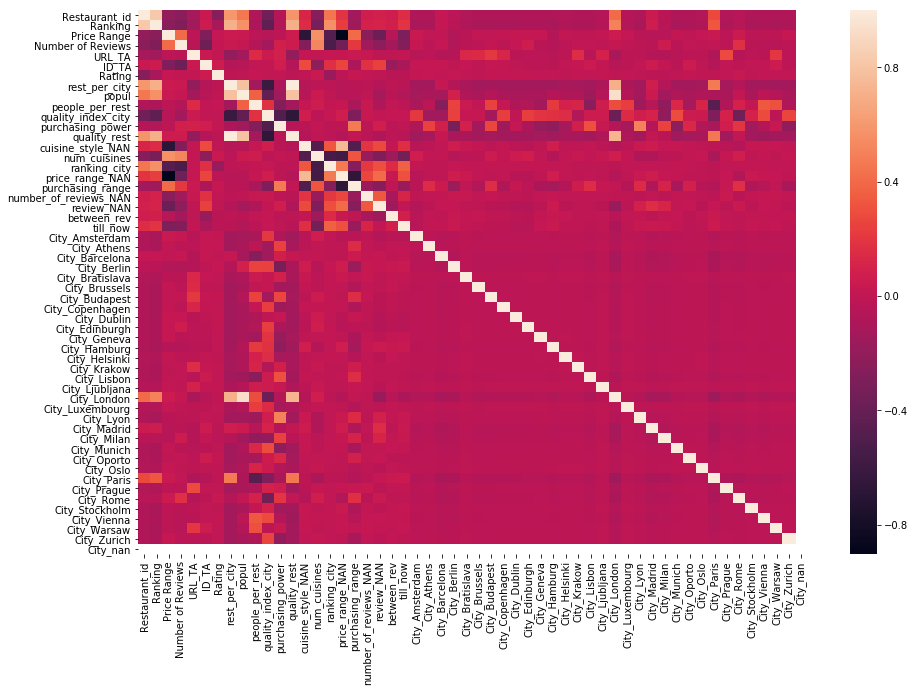

In [127]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [128]:
# # на всякий случай, заново подгружаем данные
# df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
# df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
# df_train['sample'] = 1 # помечаем где у нас трейн
# df_test['sample'] = 0 # помечаем где у нас тест
# df_test['rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

# data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
# data.info()

In [129]:
# def preproc_data(df_input):
#     '''includes several functions to pre-process the predictor data.'''
    
#     df_output = df_input.copy()
    
#     # ################### 1. Предобработка ############################################################## 
#     # убираем не нужные для модели признаки
#     df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
#     # ################### 2. NAN ############################################################## 
#     # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
#     df_output['Number of Reviews'].fillna(0, inplace=True)
#     # тут ваш код по обработке NAN
#     # ....
    
    
#     # ################### 3. Encoding ############################################################## 
#     # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#     df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
#     # тут ваш код не Encoding фитчей
#     # ....
    
    
#     # ################### 4. Feature Engineering ####################################################
#     # тут ваш код на генерацию новых фитчей
#     # ....
    
    
#     # ################### 5. Clean #################################################### 
#     # убираем признаки которые еще не успели обработать, 
#     # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
#     object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
#     df_output.drop(object_columns, axis = 1, inplace=True)
    
#     return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [130]:
# df_preproc = preproc_data(data)
# df_preproc.sample(10)

Анализ признаков:

### В процессе выполнения задания были пройдены этапы:

* признак 'Restaurant_id' коррелирует больше чем 0.8 с признаком 'Ranking' поэтому принял решение его удалить из модели

* признак 'City' - на основе этого признака были создан признаки 'rest_per_city', потом был преобразован с помощью one hot encoding

* признак 'Cuisine Style' - на основе этого признака был создан признак 'cuisine_style_NAN'(пометил таким образом пропуски) и 'num_cuisines' - количество кухонь в ресторане.

* признак 'Ranking' - на основе этого признака был создан признак 'ranking_city' - отношение ранга ресторана к количеству ресторанов в городе ('rest_per_city')

* признак 'Price Range' - пропуски этого признака выделил в отдельный признак "price_range_NAN", изменил значения признака на числовые используя Label Encoding.
 на основании этого призанка был создан признак 'purchasing_range'
 
* признак 'Number of Reviews' - пропуски этого признака выделил в отдельный признак 'number_of_reviews_NAN'

* признак 'Reviews' - пропуски этого признака выделил в отдельный признак 'review_NAN'
 на основе этого признака был создан признак 'date_review' - даты отзывов

* признак URL_TA и ID_TA - преобразовал в числовые

* На основе внешних данных были созданы 3 новых признака:

- 'popul' - число жителей города(из википедии)
- 'quality_index_city' - индекс качества жизни в городе (https://www.numbeo.com/quality-of-life/region_rankings.jsp?title=2018&region=150)
- 'purchasing_power' - индекс покупательской способности в городе (https://www.numbeo.com/quality-of-life/region_rankings.jsp?title=2018&region=150)


### В процессе выполнения задания были созданы новые признаки:

* rest_per_city - количество ресторанов в городе
* people_per_rest - количество человек на ресторан в городе
* quality_index_city - индекс качества жизни города
* quality_rest - отношение количества ресторанов в городе к индексу качества жизни города
* cuisine_style_NAN - пропуски в признаке Cuisine Style
* num_cuisines - количество кухонь в ресторане
* ranking_city - отношение ранг ресторанов по городу к количеству ресторанов в городе
* price_range_NAN - пропуски в признаке Price Range
* between_rev - число дней между отзывами
* till_now - число дней с последнего отзыва
* popul - количество человек в городе
* number_of_reviews_NAN - пропуски в признаке Number of Reviews
* purchasing_power - индекс покупательской способности
* purchasing_range - отношение индекса покупательской способности к ценовому диапазону ресторана
* date_review - дата отзывов
* review_NAN - пропуски в признаке Review

### В ходе проведенных экспериментов сделаны выводы:

#### Удалить признаки, увеличивающие MAE:

* Restaurant_id - большая корреляция c Ranking, удаляем этот признак при обучении модели
* popul - уменьшает МАЕ, но признак people_per_rest, выведеный с помощью признака popul - уменьшает МАЕ, поэтому этот признак все равно оказался полезен
* number_of_reviews_NAN - удаляем этот признак при обучении модели
* review_NAN - удаляем этот признак при обучении модели
* Ranking - удаляем этот признак при обучении модели, но этот признак оказался полезен при создании новых признаков, так что говорим ему спасибо и машем рукой
* purchasing_power - удаляем этот признак при обучении модели
* purchasing_range - удаляем этот признак при обучении модели
* Cuisine Style -  - удаляем этот признак при обучении модели, тк это категориальный признак
* Reviews - удаляем этот признак при обучении модели, тк это категориальный признак
* date_review - удаляем этот признак при обучении модели, тк это дата
* price_range_NAN - удаляем этот признак при обучении модели, тк есть сильная корреляция с признаком Price Range (судя по тепловой карте) - эксперимент это подтвердил - удаление признака уменьшает MAE

#### Оставить признаки, уменьшающие MAE:

* rest_per_city
* ranking_city
* quality_index_city
* quality_rest
* price_range_NAN
* cuisine_style_NAN
* between_rev
* till_now
* people_per_rest
* URL_TA
* ID_TA


In [174]:
df_preproc = data.drop(
    ['Restaurant_id', 'Cuisine Style', 'Reviews', 'popul', 'number_of_reviews_NAN', 'Ranking', 
     'purchasing_power', 'purchasing_range', 'date_review', 'review_NAN', 'price_range_NAN'], axis=1)

In [175]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
Price Range          50000 non-null float64
Number of Reviews    50000 non-null float64
URL_TA               50000 non-null float64
ID_TA                50000 non-null int64
sample               50000 non-null int64
Rating               50000 non-null float64
rest_per_city        50000 non-null int64
people_per_rest      50000 non-null float64
quality_rest         50000 non-null float64
cuisine_style_NAN    50000 non-null uint8
num_cuisines         50000 non-null int64
ranking_city         50000 non-null float64
between_rev          50000 non-null float64
till_now             50000 non-null float64
City_Amsterdam       50000 non-null uint8
City_Athens          50000 non-null uint8
City_Barcelona       50000 non-null uint8
City_Berlin          50000 non-null uint8
City_Bratislava      50000 non-null uint8
City_Brussels        50000 non-null uint8
City_Budapest        50000 non-nu

In [176]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [177]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [178]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 45), (40000, 45), (40000, 44), (32000, 44), (8000, 44))

# Model 
Сам ML

In [179]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [181]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [182]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [183]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.19849562499999998


# Тестирование
* 0.21240125 в skillfactory
* 0.21071687499999997 c rest_id
* 0.21069187499999997 без rest_id, тк он сильно коррелирует с ranking
* 0.21064999999999998 замена на ноль дает меньший mae чем замена на среднее
* 0.208993125 ввел новый признак - количество ресторанов в городе 'rest_per_city'
* 0.20789625 ввел новый признак - 'ranking_city' отношение ранга ресторана к количеству ресторанов в городе
* 0.208174375 без 'rest_per_city' всетаки он улучшает mae
* 0.2081875 признак 'popul' ухудшает mae
* 0.20669374999999998 - ввел новый признак - индекс качества жизни в городе.
* 0.206556875 - ввел новый признак - отношение количества ресторанов в городе к качеству жизни в городе
* 0.20653249999999998 - без признака number_of_reviews_NAN mae уменьшается
* 0.20652062499999999 - без признака review_NAN mae уменьшается
* 0.206634375 - без признака price_range_NAN mae увеличивается
* 0.206573125 - без признака cuisine_style_NAN mae увеличивается
* 0.20650687499999998 - без признака ranking mae уменьшается
* 0.206800625 - ввел новый признак - индекс покупательской способности purchasing_power в городе mae увеличивает
* 0.20701874999999997 - ввел новый признак purchasing_range отношение покупат способности к ценовому диапазону mae увеличивает
* 0.20430999999999996 - ввел новый признак between_rev количество дней между отзывами
* 0.200336875 - ввел новый признак till_now кол дней с отзыва до сегодняшнего дня
* 0.19965999999999998 - ввел новый признак people_per_rest отношение населения к колву ресторанов
* 0.19952749999999997 - преобразовал признак 'URL_TA' в код города и добавил в обучение модели - улучшил MAE
* 0.19680562499999998 - преобразовал признак 'ID_TA' в айди ресторана и добавил в обучение модели - улучшил MAE
* 0.196693125 - price_range_NAN


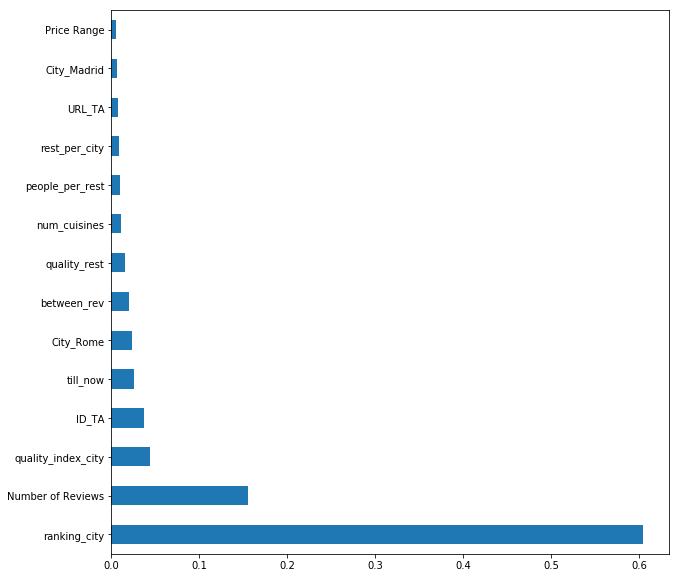

In [140]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [141]:
test_data.sample(10)

Price Range  Number of Reviews    URL_TA     ID_TA  Rating  \
9989          0.0                2.0  187147.0  12280276     0.0   
2359          2.0               42.0  187147.0   3727273     0.0   
9579          2.0               34.0  274707.0   5414953     0.0   
7781          0.0                5.0  187323.0   1037131     0.0   
604           2.0              478.0  188113.0   4363779     0.0   
3162          3.0               14.0  189934.0   6223052     0.0   
3666          0.0                5.0  186338.0   8730782     0.0   
2218          1.0               27.0  187791.0   6196829     0.0   
3152          2.0               41.0  187849.0  11856095     0.0   
8120          0.0               17.0  187791.0   8111216     0.0   

      rest_per_city  people_per_rest  quality_index_city  quality_rest  \
9989           6108       351.714309              128.54     47.518282   
2359           6108       351.714309              128.54     47.518282   
9579           1816       729.227423              160.31     11.328052   
7781           2705      1393.528651              172.32     15.697539   
604             685       606.153285              202.37      3.384889   
3162            475      1381.534737              186.75      2.543507   
3666           7193      1238.576533              124.80     57.636218   
2218           2589      1104.677095              109.84     23.570648   
3152           2694       519.621381              126.10     21.363997   
8120           2589      1104.677095              109.84     23.570648   

      cuisine_style_NAN  ...  City_Oporto  City_Oslo  City_Paris  City_Prague  \
9989                  0  ...            0          0           1            0   
2359                  0  ...            0          0           1            0   
9579                  0  ...            0          0           0            1   
7781                  1  ...            0          0           0            0   
604                   0  ...            0          0           0            0   
3162                  0  ...            0          0           0            0   
3666                  1  ...            0          0           0            0   
2218                  0  ...            0          0           0            0   
3152                  0  ...            0          0           0            0   
8120                  1  ...            0          0           0            0   

      City_Rome  City_Stockholm  City_Vienna  City_Warsaw  City_Zurich  \
9989          0               0            0            0            0   
2359          0               0            0            0            0   
9579          0               0            0            0            0   
7781          0               0            0            0            0   
604           0               0            0            0            1   
3162          0               0            0            0            0   
3666          0               0            0            0            0   
2218          1               0            0            0            0   
3152          0               0            0            0            0   
8120          1               0            0            0            0   

      City_nan  
9989         0  
2359         0  
9579         0  
7781         0  
604          0  
3162         0  
3666         0  
2218         0  
3152         0  
8120         0  

[10 rows x 47 columns]

In [142]:
test_data = test_data.drop(['Rating'], axis=1)

In [143]:
sample_submission

Restaurant_id  Rating
0             id_0     2.0
1             id_1     2.5
2             id_2     4.0
3             id_3     1.0
4             id_4     4.0
...            ...     ...
9995       id_9995     3.0
9996       id_9996     1.5
9997       id_9997     4.5
9998       id_9998     1.0
9999       id_9999     2.5

[10000 rows x 2 columns]

In [144]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [145]:
predict_submission

array([3.12 , 4.18 , 4.21 , ..., 3.015, 4.495, 4.26 ])

In [146]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

Restaurant_id  Rating
0          id_0   3.120
1          id_1   4.180
2          id_2   4.210
3          id_3   4.375
4          id_4   4.435
5          id_5   4.425
6          id_6   2.525
7          id_7   2.340
8          id_8   4.090
9          id_9   4.505

# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!


In [ ]:
# Final